# Analysis of Democratic Primary Polling, 2019

Data taken from FiveThirtyEight's aggregation of polls for the 2019 primary.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_raw = pd.read_csv('https://projects.fivethirtyeight.com/polls-page/president_primary_polls.csv')

In [3]:
data_raw.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,114861,63091,2020,South Carolina,1365,Change Research,191,The Post and Courier,Change Research,48.0,...,False,12/12/19 15:58,NaN,https://www.postandcourier.com/politics/biden-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,27.0
1,114861,63091,2020,South Carolina,1365,Change Research,191,The Post and Courier,Change Research,48.0,...,False,12/12/19 15:58,NaN,https://www.postandcourier.com/politics/biden-...,primary,DEM,Sanders,13257,Bernard Sanders,20.0
2,114861,63091,2020,South Carolina,1365,Change Research,191,The Post and Courier,Change Research,48.0,...,False,12/12/19 15:58,NaN,https://www.postandcourier.com/politics/biden-...,primary,DEM,Warren,13258,Elizabeth Warren,19.0
3,114861,63091,2020,South Carolina,1365,Change Research,191,The Post and Courier,Change Research,48.0,...,False,12/12/19 15:58,NaN,https://www.postandcourier.com/politics/biden-...,primary,DEM,Buttigieg,13345,Pete Buttigieg,9.0
4,114861,63091,2020,South Carolina,1365,Change Research,191,The Post and Courier,Change Research,48.0,...,False,12/12/19 15:58,NaN,https://www.postandcourier.com/politics/biden-...,primary,DEM,Booker,13287,Cory A. Booker,5.0


# Tasks

### Clean Data
(can fiddle with how to clean in different ways)

1. get a feature for each candidate's percentage for each poll (question id)
2. other features can include many features in the raw data sans the candidate names and percentages. e.g. poll_id, rating, poll name, etc.


### Analyze Data

## Cleaning Process

First, work on step 1 from above cell.


In [4]:
#drop all state polls

indices = data_raw.index

for i in indices:
    if(not data_raw['state'].isna().loc[i]):
        data_raw.drop(axis = 0,index = i,inplace=True)

In [5]:
data_raw.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
30,114574,63065,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,12/11/19 09:07,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,primary,REP,Trump,13254,Donald Trump,88.0
31,114574,63065,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,12/11/19 09:07,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,primary,REP,Weld,13351,William F. Weld,2.0
32,114574,63065,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,12/11/19 09:07,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,primary,REP,Walsh,13482,Joe Walsh,2.0
33,114575,63065,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,12/11/19 09:07,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0
34,114575,63065,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,12/11/19 09:07,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,primary,DEM,Warren,13258,Elizabeth Warren,21.0


In [6]:
question_ids = data_raw['question_id'].unique()

In [7]:
data_clean = pd.DataFrame(index = question_ids, 
                            columns = ['start_date','end_date','sample_size','population','population_full',
                                       'pollster','pollster_id','pollster_grade', 
                                       'Buttigieg-pct','Biden-pct','Sanders-pct','Warren-pct'])

for q_id in question_ids:
    data_clean.loc[q_id]['start_date'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['start_date']
    data_clean.loc[q_id]['end_date'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['end_date']
    data_clean.loc[q_id]['pollster'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['pollster']
    data_clean.loc[q_id]['pollster_id'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['pollster_id']
    data_clean.loc[q_id]['sample_size'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['sample_size']
    data_clean.loc[q_id]['population_full'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['population_full']
    data_clean.loc[q_id]['population'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['population']
    data_clean.loc[q_id]['pollster_grade'] = data_raw[data_raw['question_id'] == q_id].iloc[0]['fte_grade']

data_clean['Buttigieg-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Buttigieg']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Buttigieg']['question_id'],
                      name = 'Buttigieg-pct')

data_clean['Biden-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Biden']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Biden']['question_id'],
                      name = 'Biden-pct')

data_clean['Sanders-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Sanders']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Sanders']['question_id'],
                      name = 'Sanders-pct')

data_clean['Warren-pct'] = pd.Series(data = np.array(data_raw[data_raw['answer'] == 'Warren']['pct']), 
                       index = data_raw[data_raw['answer'] == 'Warren']['question_id'],
                      name = 'Warren-pct')


In [8]:
data_clean.head()

,start_date,end_date,sample_size,population,population_full,pollster,pollster_id,pollster_grade,Buttigieg-pct,Biden-pct,Sanders-pct,Warren-pct
114574,12/7/19,12/10/19,422,lv,lv-r,YouGov,568,B-,NaN,NaN,NaN,NaN
114575,12/7/19,12/10/19,497,lv,lv-d,YouGov,568,B-,11.0,26.0,16.0,21.0
114517,12/4/19,12/9/19,665,rv,rv-d,Quinnipiac University,396,B+,9.0,29.0,17.0,15.0
114381,12/4/19,12/8/19,384,rv,rv-d,Monmouth University,320,A+,8.0,26.0,21.0,17.0
114352,12/2/19,12/8/19,15442,lv,lv-d,Morning Consult,1189,B/C,9.0,30.0,22.0,16.0


In [9]:
data_clean.describe()

,Buttigieg-pct,Biden-pct,Sanders-pct,Warren-pct
count,417.000000,473.000000,468.000000,469.000000
mean,5.315803,30.873171,18.066688,15.063070
std,2.742772,7.480953,6.121154,8.369764
min,0.000000,9.000000,4.000000,2.000000
25%,4.000000,27.000000,15.000000,9.000000
50%,5.000000,30.000000,16.700000,14.000000
75%,6.300000,33.000000,19.000000,19.000000
max,21.000000,66.000000,44.000000,55.000000


In [10]:
data_clean.start_date = data_clean.start_date.astype("datetime64")
data_clean.end_date = data_clean.end_date.astype("datetime64")

In [11]:
data_clean.start_date.head()

114574   2019-12-07
114575   2019-12-07
114517   2019-12-04
114381   2019-12-04
114352   2019-12-02
Name: start_date, dtype: datetime64[ns]

## Data Analysis

Now that we have a clean data set, we can do some plotting and analysis

First, we show a plot of how the different candidates are doing as a function of time.
From the results, we can see that it might be useful to do some smoothing...

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

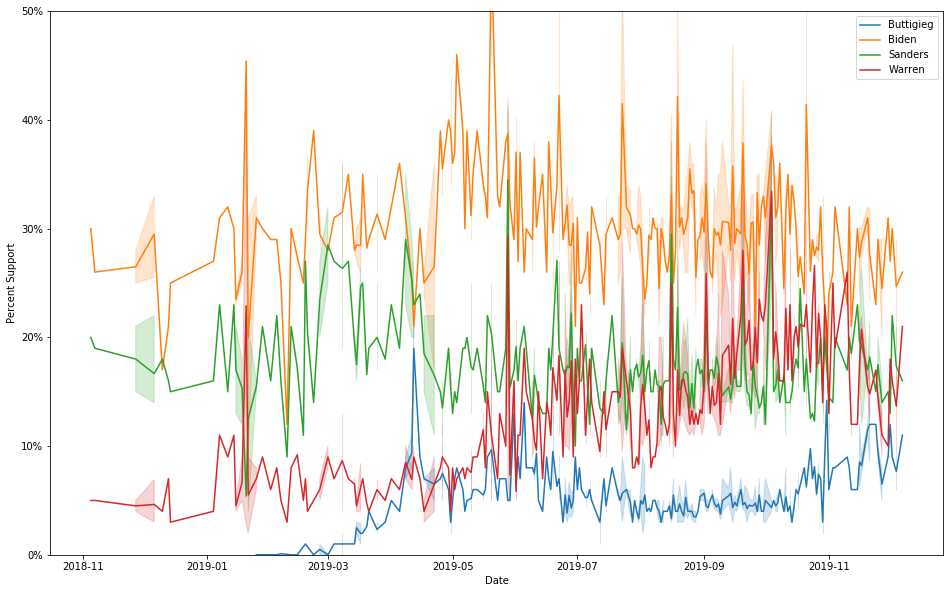

In [12]:
%matplotlib inline

plt.figure(figsize=(16,10))

sns.lineplot(x = 'start_date', y = 'Buttigieg-pct', data=data_clean, label = "Buttigieg")
sns.lineplot(x = 'start_date', y = 'Biden-pct', data=data_clean, label = "Biden")
sns.lineplot(x = 'start_date', y = 'Sanders-pct', data=data_clean, label = "Sanders")
sns.lineplot(x = 'start_date', y = 'Warren-pct', data=data_clean, label = "Warren")

#plt.xlim([np.datetime64('2019-07'),np.datetime64('2020-01')])

plt.ylabel('Percent Support')
plt.ylim(0,50)
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
new_labels
plt.yticks(yticks[0],new_labels)

plt.xlabel('Date')


### Smoothing

#### Polynomial Regression

In [13]:
data_clean_drop = data_clean.dropna(axis = 0)

In [14]:
data_clean_drop['date_ordinal'] = pd.to_datetime(data_clean_drop['start_date']).apply(lambda start_date: start_date.toordinal())
data_clean_drop[['start_date','date_ordinal']].head()

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,start_date,date_ordinal
114575,2019-12-07,737400
114517,2019-12-04,737397
114381,2019-12-04,737397
114352,2019-12-02,737395
114282,2019-12-04,737397


Text(0.5, 1.0, 'Democratic Primary - Candidate Support')

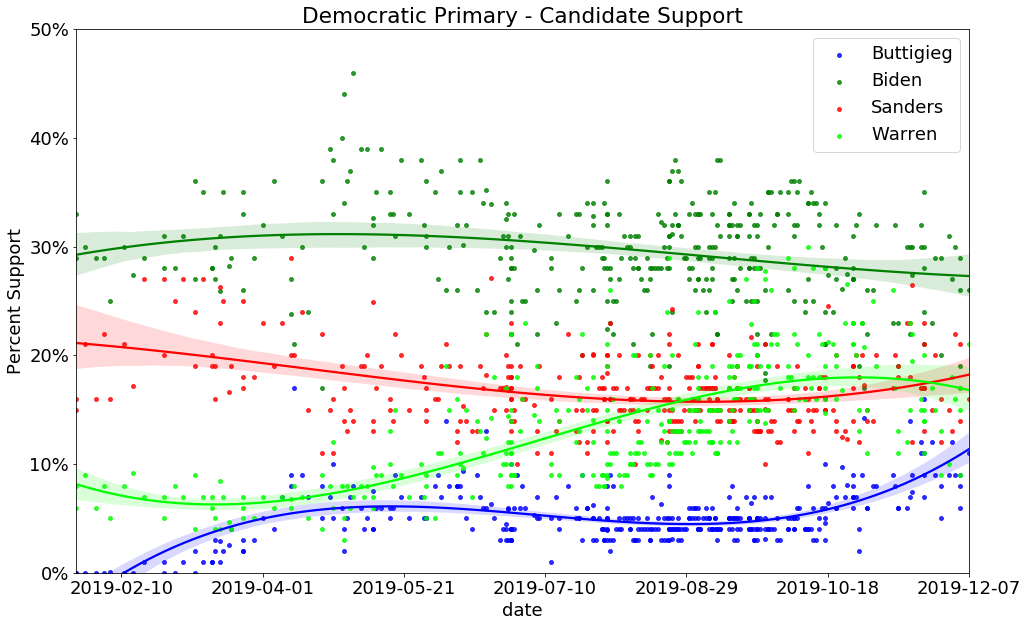

In [15]:
import warnings
import datetime
warnings.simplefilter('ignore', np.RankWarning)
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(16,10))
deg_order =20

sns.regplot(x ='date_ordinal', y = data_clean_drop['Buttigieg-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Buttigieg",color = 'blue')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Biden-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Biden", color = 'green')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Sanders-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Sanders",color='red')
sns.regplot(x ='date_ordinal', y = data_clean_drop['Warren-pct'], data = data_clean_drop, order = deg_order, truncate = True, scatter_kws={'s':15}, label = "Warren",color = (0.0,1,0.0))



plt.legend()
plt.xlabel('date')
plt.xlim(data_clean_drop['date_ordinal'].min() - 1, data_clean_drop['date_ordinal'].max() + 1)#new_labels = [datetime.date.fromordinal(int(item)) for item in plt.xticks()]

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean_drop['start_date'].min(),data_clean_drop['start_date'].max())

plt.ylabel('Percent Support')
plt.ylim(0,50)
yticks = np.array(plt.yticks())
new_labels = [str(int(item)) + '%' for item in yticks[0]]
plt.yticks(yticks[0],new_labels)

plt.title('Democratic Primary - Candidate Support')


### Other ideas

Can use machine learning to predict poll biases for each candidate, and reweight based on how each poll favors a candidate

e.g. if Warren does 5 points better than average on a particular poll, machine learning can determine that, and then I can correct for it

### Machine Learning poll bias

First, learn based on date, pollster, population, and pollster's FiveThirtyEight rating

Then can later compare to the prediction based on date alone

In [16]:
attributes = ['date_ordinal','population','pollster_grade','pollster_id']
cat_attributes = ['population','pollster_grade']

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_clean_prep = data_clean_drop[attributes]

for col in cat_attributes:
    data_clean_prep[col] = encoder.fit_transform(data_clean_prep[col])

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data_clean_prep.head()

,date_ordinal,population,pollster_grade,pollster_id
114575,737400,1,6,568
114517,737397,2,5,396
114381,737397,2,1,320
114352,737395,1,7,1189
114282,737397,0,6,744


In [19]:
data_clean_drop.index

Int64Index([114575, 114517, 114381, 114352, 114282, 114186, 114121, 114122,
            114288, 114331,
            ...
             94390,  93297,  93201,  93171,  93159,  93087,  93094,  92987,
             92991,  92931],
           dtype='int64', length=373)

In [20]:
from sklearn.model_selection import train_test_split

X = data_clean_prep
y_index = data_clean_drop.index
y_butt = data_clean_drop['Buttigieg-pct']
y_warren = data_clean_drop['Warren-pct']
y_biden = data_clean_drop['Biden-pct']
y_sanders = data_clean_drop['Sanders-pct']

X_train, X_valid, y_train_index, y_valid_index = train_test_split(X, y_index,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=42)


In [21]:
y_train_butt = y_butt.loc[y_train_index]
y_train_warren = y_warren.loc[y_train_index]
y_train_biden = y_biden.loc[y_train_index]
y_train_sanders = y_sanders.loc[y_train_index]

y_valid_butt = y_butt.loc[y_valid_index]
y_valid_warren = y_warren.loc[y_valid_index]
y_valid_biden = y_biden.loc[y_valid_index]
y_valid_sanders = y_sanders.loc[y_valid_index]



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model_butt = RandomForestRegressor(random_state = 42)
forest_model_warren = RandomForestRegressor(random_state = 42)
forest_model_biden = RandomForestRegressor(random_state = 42)
forest_model_sanders = RandomForestRegressor(random_state = 42)

forest_model_butt.fit(X_train,y_train_butt)
forest_model_warren.fit(X_train,y_train_warren)
forest_model_biden.fit(X_train,y_train_biden)
forest_model_sanders.fit(X_train,y_train_sanders)


butt_preds = forest_model_butt.predict(X_valid)
warren_preds = forest_model_warren.predict(X_valid)
biden_preds = forest_model_biden.predict(X_valid)
sanders_preds = forest_model_sanders.predict(X_valid)

print(mean_absolute_error(butt_preds,y_valid_butt))
print(mean_absolute_error(warren_preds,y_valid_warren))
print(mean_absolute_error(biden_preds,y_valid_biden))
print(mean_absolute_error(sanders_preds,y_valid_sanders))

1.1448444444444443
1.6683155555555556
1.956533333333333
1.5707155555555556


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Machine learning based on date of poll alone

In [23]:
X = X['date_ordinal']
X_train = X_train['date_ordinal']
X_valid = X_valid['date_ordinal']

X_train = np.array(X_train).reshape(-1,1)
X_valid = np.array(X_valid).reshape(-1,1)

In [24]:
forest_model_butt_dates = RandomForestRegressor(random_state = 42)
forest_model_warren_dates = RandomForestRegressor(random_state = 42)
forest_model_biden_dates = RandomForestRegressor(random_state = 42)
forest_model_sanders_dates = RandomForestRegressor(random_state = 42)

forest_model_butt_dates.fit(X_train,y_train_butt)
forest_model_warren_dates.fit(X_train,y_train_warren)
forest_model_biden_dates.fit(X_train,y_train_biden)
forest_model_sanders_dates.fit(X_train,y_train_sanders)


butt_preds_dates = forest_model_butt_dates.predict(X_valid)
warren_preds_dates = forest_model_warren_dates.predict(X_valid)
biden_preds_dates = forest_model_biden_dates.predict(X_valid)
sanders_preds_dates = forest_model_sanders_dates.predict(X_valid)

print(mean_absolute_error(butt_preds_dates,y_valid_butt))
print(mean_absolute_error(warren_preds_dates,y_valid_warren))
print(mean_absolute_error(biden_preds_dates,y_valid_biden))
print(mean_absolute_error(sanders_preds_dates,y_valid_sanders))

1.5721793650793652
3.6204240115440114
3.795967643097644
2.5705691582491585


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Continuing, can subtract the full predictions from the predictions based only on dates (after I run model on full dataset)

Then, can average the difference for a particular pollster, for a particular population sample, etc, to determine the bias factor

In [25]:
X = data_clean_prep

In [26]:
forest_model_butt.fit(X,y_butt)
forest_model_warren.fit(X,y_warren)
forest_model_biden.fit(X,y_biden)
forest_model_sanders.fit(X,y_sanders)

butt_preds = forest_model_butt.predict(X)
warren_preds = forest_model_warren.predict(X)
biden_preds = forest_model_biden.predict(X)
sanders_preds = forest_model_sanders.predict(X)

In [27]:
X_dates = np.array(X['date_ordinal']).reshape(-1,1)

forest_model_butt_dates.fit(X_dates,y_butt)
forest_model_warren_dates.fit(X_dates,y_warren)
forest_model_biden_dates.fit(X_dates,y_biden)
forest_model_sanders_dates.fit(X_dates,y_sanders)

butt_preds_dates = forest_model_butt_dates.predict(X_dates)
warren_preds_dates = forest_model_warren_dates.predict(X_dates)
biden_preds_dates = forest_model_biden_dates.predict(X_dates)
sanders_preds_dates = forest_model_sanders_dates.predict(X_dates)

In [28]:
data_clean_drop['prediction_diff-Buttigieg'] = butt_preds - butt_preds_dates
data_clean_drop['prediction_diff-Warren'] = warren_preds - warren_preds_dates
data_clean_drop['prediction_diff-Biden'] = biden_preds - biden_preds_dates
data_clean_drop['prediction_diff-Sanders'] = sanders_preds - sanders_preds_dates


/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [29]:
data_clean_drop.head()

,start_date,end_date,sample_size,population,population_full,pollster,pollster_id,pollster_grade,Buttigieg-pct,Biden-pct,Sanders-pct,Warren-pct,date_ordinal,prediction_diff-Buttigieg,prediction_diff-Warren,prediction_diff-Biden,prediction_diff-Sanders
114575,2019-12-07,2019-12-10,497,lv,lv-d,YouGov,568,B-,11.0,26.0,16.0,21.0,737400,1.1200,1.440,-0.333333,-1.280
114517,2019-12-04,2019-12-09,665,rv,rv-d,Quinnipiac University,396,B+,9.0,29.0,17.0,15.0,737397,1.6075,1.265,2.254167,-1.355
114381,2019-12-04,2019-12-08,384,rv,rv-d,Monmouth University,320,A+,8.0,26.0,21.0,17.0,737397,0.9675,2.015,0.754167,1.945
114352,2019-12-02,2019-12-08,15442,lv,lv-d,Morning Consult,1189,B/C,9.0,30.0,22.0,16.0,737395,0.0000,0.600,-0.460000,1.000
114282,2019-12-04,2019-12-05,719,a,a-d,Ipsos,744,B-,6.0,19.0,14.0,9.0,737397,-0.5925,-3.535,-5.745833,-1.605


In [30]:
ex = data_clean_drop[data_clean_drop['pollster'] == 'YouGov']
ex['prediction_diff-Buttigieg'].mean()

0.8374060019841268

In [31]:
data_clean_drop.pollster.unique()

array(['YouGov', 'Quinnipiac University', 'Monmouth University',
       'Morning Consult', 'Ipsos', 'Harris Insights & Analytics', 'SSRS',
       'SurveyUSA', 'SocialSphere', 'Emerson College', 'Change Research',
       'USC Dornsife/LA Times', 'IBD/TIPP', 'ABC News/Washington Post',
       'Fox News/Beacon Research/Shaw & Co. Research',
       'NBC News/Wall Street Journal', 'Suffolk University',
       'McLaughlin & Associates', 'Public Religion Research Institute',
       'Zogby Interactive/JZ Analytics', 'GQR Research (GQRR)',
       'Benenson Strategy Group', 'Public Policy Polling',
       'Pew Research Center', 'SurveyMonkey', 'WPA Intelligence (WPAi)',
       'GBAO'], dtype=object)